Stock Price Prediction with daily news Keras NLP Vader Sentiment Analaysis

In [3]:
import re
import nltk
import pandas as pd
import numpy as np
import os
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc

Using TensorFlow backend.


In [4]:
from nltk.stem.porter import PorterStemmer
from keras import initializers
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.preprocessing import normalize, binarize, LabelBinarizer

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [5]:
path=r'''C:\Users\syurasek\OneDrive - Constellation Brands\Documents\Northwestern\PREDICT 458\MSDS 458 Final project'''
os.chdir(path)

In [6]:
data = pd.read_csv('Combined_News_DJIA.csv')

In [5]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,8/14/2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to mis

In [7]:
dj = pd.read_csv("DJIA_table.csv", parse_dates=[0])

In [8]:
dj.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


In [9]:
news = pd.read_csv('RedditNews.csv')

In [10]:
news.head()

,Date,News
0,6/8/2008,b'Nim Chimpsky: The tragedy of the chimp who t...
1,6/8/2008,"b""Canada: Beware slippery slope' to censorship..."
2,6/8/2008,b'EU Vice-President Luisa Morgantini and the I...
3,6/8/2008,"b""Israeli minister: Israel will attack Iran if..."
4,6/8/2008,b'Albino Killings in Tanzania. At least 19 alb...


In [10]:
print(data.shape)
print(news.shape)

(1989, 27)
(73608, 2)


In [11]:
print(dj.shape)
print(dj.dtypes)

(1989, 7)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


In [12]:
###EDA###

###Word cloud code referenced from https://www.kaggle.com/praga95/predicting-stock-rise-with-news#Advanced-Modeling

In [23]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib as mpl

#https://www.kaggle.com/elisayao/visualization

In [25]:
mpl.rcParams["figure.figsize"] = "8, 8"

data['Combined']=data.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)


In [34]:
non_down = data[data['Label']==1]
down = data[data['Label']==0]
print(len(non_down)/len(data))

0.5354449472096531


In [35]:
def to_words(content):
    letters = re.sub("[^a-zA-Z]"," ", content)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    mwords = [w for w in words if not w in stops]
    return(" ".join( mwords))

In [36]:
non_down_word = []
down_word = []
for word in non_down['Combined']:
    non_down_word.append(to_words(word))

for word in down['Combined']:
    down_word.append(to_words(word))

In [37]:
wordcloud_down = WordCloud(background_color='black',
                          width=3000,
                          height=2500
                          ).generate(down_word[0])

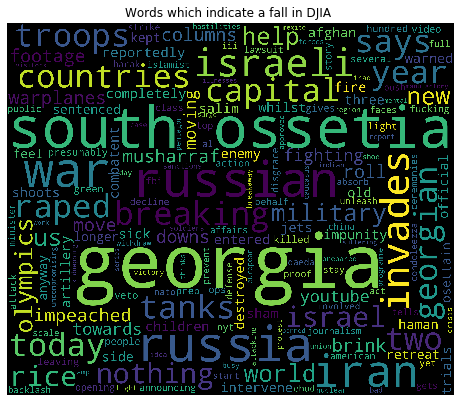

In [38]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_down)
plt.title("Words which indicate a fall in DJIA ")
plt.axis('off')
plt.show()

In [39]:
wordcloud_non = WordCloud(background_color='white',
                         width=3000,
                         height=2500
                         ).generate(non_down_word[0])

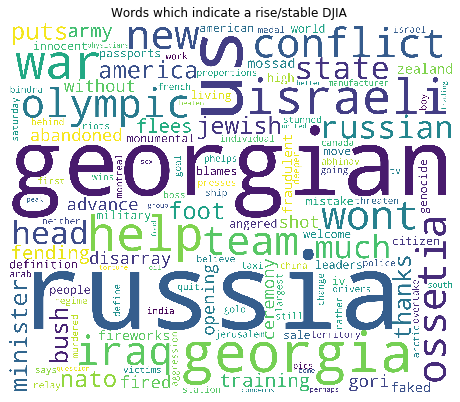

In [40]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_non)
plt.title("Words which indicate a rise/stable DJIA ")
plt.axis('off')
plt.show()

In [41]:
###Sentiment Analysis Vader Lexicon

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
data.Date = pd.to_datetime(data.Date)
scores = pd.DataFrame(index = data.Date, columns = ['Compound', 'Positive', 'Negative', "Neutral"])

In [13]:
analyzer = SentimentIntensityAnalyzer() # Use the VADER Sentiment Analyzer 
for j in range(1,data.shape[0]):    
    tmp_neu = 0
    tmp_neg = 0
    tmp_pos = 0
    tmp_comp = 0
    for i in range(2,data.shape[1]):
        text = data.iloc[j,i]
        if(str(text) == "nan"):
            tmp_comp +=  0
            tmp_neg += 0
            tmp_neu += 0
            tmp_pos += 0
        else:
            vs = analyzer.polarity_scores(data.iloc[j,i])
            tmp_comp +=  vs['compound']
            tmp_neg += vs['neg']
            tmp_neu += vs['neu']
            tmp_pos += vs['pos']
    
    scores.iloc[j,] = [tmp_comp, tmp_pos, tmp_neg, tmp_neu]


In [14]:
scores.tail()

,Compound,Positive,Negative,Neutral
Date,,,,
2016-06-27,-3.5664,2.051,4.124,18.826
2016-06-28,-1.6828,2.429,3.545,19.024
2016-06-29,-6.0135,2.21,4.797,17.991
2016-06-30,-7.0149,1.725,4.516,18.759
2016-07-01,-8.4568,1.911,5.12,17.968


In [15]:
print(scores.dtypes)

Compound    object
Positive    object
Negative    object
Neutral     object
dtype: object


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


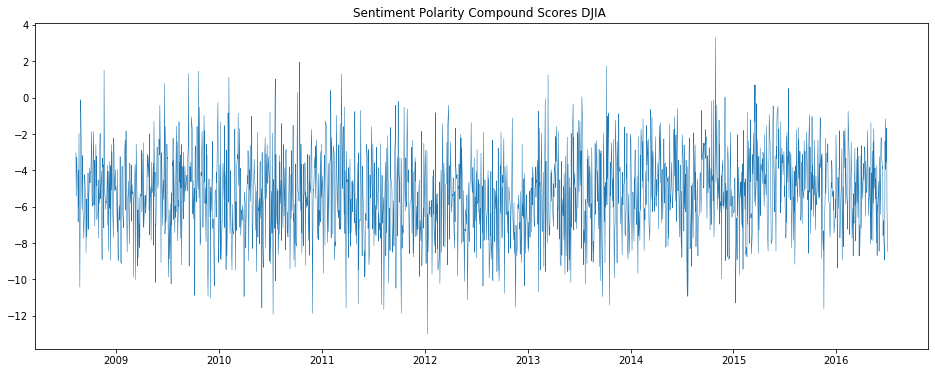

In [15]:
scores = scores.dropna()
plt.figure(figsize=(16,6))
plt.plot(scores.Compound, linewidth=0.5)
plt.title("Sentiment Polarity Compound Scores DJIA ")
plt.show()

In [118]:
from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, merge, \
                         BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [204]:
#### Part I Analysis based on 25 news headlead binanry prediction of up or down of the Dow Jones
#### Binary classification analysis to evalate preditability between sentiment and down '0' or up'1' for the stock market

In [272]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [273]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [274]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(823, 23711)


In [30]:
#Benchmark using time series logistic regression 

In [275]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [276]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
preds1 = basicmodel.predict(basictest)
acc1=accuracy_score(test['Label'], preds1)
print('Logic Regression 1 accuracy: ',acc1 )

Logic Regression 1 accuracy:  0.48713550600343053


In [33]:
#Benchmark set by using simply logic regression and we got 43% accuracy

In [277]:
basicwords = basicvectorizer.get_feature_names()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(15)

,Word,Coefficient
23145,what,0.489693
2125,attack,0.437294
21846,troops,0.381496
9510,greek,0.372436
18916,self,0.370329
13709,missiles,0.368702
16270,political,0.359946
16549,president,0.355315
1357,al,0.348009
19270,shooting,0.320547


In [27]:
coeffdf.tail(15)

,Word,Coefficient
3852,capital,-0.319735
19962,speech,-0.320277
13544,middle,-0.322919
1226,after,-0.325064
9432,governments,-0.333533
15224,our,-0.340289
4300,child,-0.341262
18545,sanctions,-0.344218
20915,system,-0.355777
18378,run,-0.361631


In [36]:
#Deep learning Model 1-Dense 

In [28]:
batch_size = 32
nb_classes = 2
advancedvectorizer = TfidfVectorizer( min_df=0.04, max_df=0.3, max_features = 200000, ngram_range = (2, 2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
print(advancedtrain.shape)

(823, 409)


In [29]:
X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]

# Dense Neural Network
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and Adam as the optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

X_train shape: (823, 409)
X_test shape: (1166, 409)


In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               102912    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 136,066
Trainable params: 136,066
Non-trainable params: 0
________________________________________________

In [3]:
import time
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

Using TensorFlow backend.


In [60]:
start_time_m = time.time()
history= model.fit(X_train,
                    Y_train,
                    nb_epoch=20,
                    batch_size=16,
                    validation_split=0.15)
total_time_m = time.time() - start_time_m

print("The DNN model took %.4f seconds to train." % (total_time_m))
predsMLP = model.predict_classes(X_test, verbose=0)
accMLP = accuracy_score(test["Label"], predsMLP)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1369 samples, validate on 242 samples
Epoch 1/20
1369/1369 [==============================] - 4s 3ms/step - loss: 0.6926 - acc: 0.5420 - val_loss: 0.6860 - val_acc: 0.5620
Epoch 2/20
1369/1369 [==============================] - 1s 1ms/step - loss: 0.6225 - acc: 0.7064 - val_loss: 0.7032 - val_acc: 0.5785: 0s - loss: 0.6454
Epoch 3/20
1369/1369 [==============================] - 3s 2ms/step - loss: 0.4653 - acc: 0.8006 - val_loss: 0.8441 - val_acc: 0.5455
Epoch 4/20
1369/1369 [==============================] - 2s 2ms/step - loss: 0.2142 - acc: 0.9445 - val_loss: 1.2178 - val_acc: 0.5289
Epoch 5/20
1369/1369 [==============================] - 2s 1ms/step - loss: 0.0522 - acc: 0.9934 - val_loss: 1.4897 - val_acc: 0.5248.0585 - acc
Epoch 6/20
1369/1369 [==============================] - 2s 2ms/step - loss: 0.0095 - acc: 1.0000 - val_loss: 1.6967 - val_acc: 0.5165
Epoch 7/20
1369/1369 [==============================] - 2s 2ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.8398 - v

In [61]:
print('prediction accuracy: ', accMLP)

prediction accuracy:  0.5343915343915344


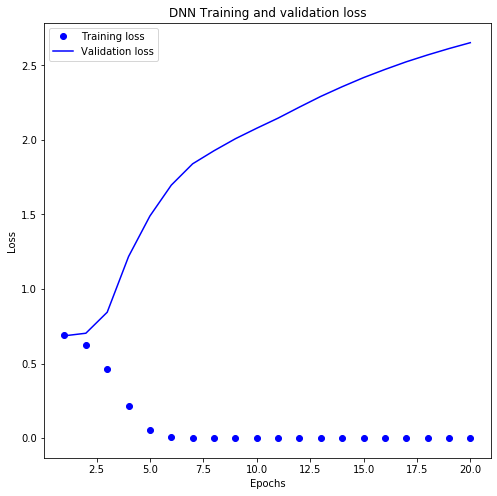

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

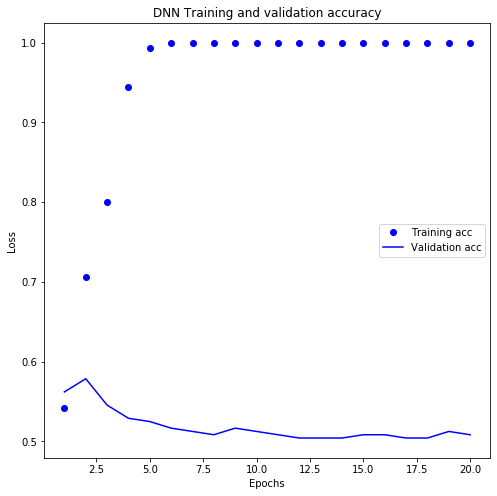

In [68]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [65]:
#CNN 1D network

In [66]:
nb_filter = 120
filter_length = 2
hidden_dims = 120
max_features = 20000
embedding_dims = 128

In [67]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims, dropout=0.2))
# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))

def max_1d(X):
    return K.max(X, axis=1)

model.add(Lambda(max_1d, output_shape=(nb_filter,)))
model.add(Dense(hidden_dims)) 
model.add(Dropout(0.2)) 
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Build model...


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=120, kernel_size=2, strides=1, padding="valid")`
  # Remove the CWD from sys.path while we load stuff.


In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 120)         30840     
_________________________________________________________________
lambda_1 (Lambda)            (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [70]:
start_time_m1 = time.time()
history= model.fit(X_train,
                    Y_train,
                    nb_epoch=20,
                    batch_size=16,
                    validation_split=0.15)
total_time_m1 = time.time() - start_time_m1

print("The CNN model took %.4f seconds to train." % (total_time_m1))
predsCNN = model.predict_classes(X_test, verbose=0)
accCNN = accuracy_score(test["Label"], predsCNN)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1369 samples, validate on 242 samples
Epoch 1/20
1369/1369 [==============================] - 17s 12ms/step - loss: 0.6914 - acc: 0.5278 - val_loss: 0.6879 - val_acc: 0.5579
Epoch 2/20
1369/1369 [==============================] - 15s 11ms/step - loss: 0.6908 - acc: 0.5310 - val_loss: 0.6865 - val_acc: 0.5579
Epoch 3/20
1369/1369 [==============================] - 15s 11ms/step - loss: 0.6898 - acc: 0.5391 - val_loss: 0.6903 - val_acc: 0.5579
Epoch 4/20
1369/1369 [==============================] - 15s 11ms/step - loss: 0.6910 - acc: 0.5391 - val_loss: 0.6876 - val_acc: 0.5579
Epoch 5/20
1369/1369 [==============================] - 14s 10ms/step - loss: 0.6907 - acc: 0.5391 - val_loss: 0.6869 - val_acc: 0.5579
Epoch 6/20
1369/1369 [==============================] - 14s 10ms/step - loss: 0.6904 - acc: 0.5391 - val_loss: 0.6877 - val_acc: 0.5579
Epoch 7/20
1369/1369 [==============================] - 14s 10ms/step - loss: 0.6908 - acc: 0.5391 - val_loss: 0.6871 - val_acc: 0.5579
E

In [71]:
print('prediction accuracy: ', accCNN)

prediction accuracy:  0.5079365079365079


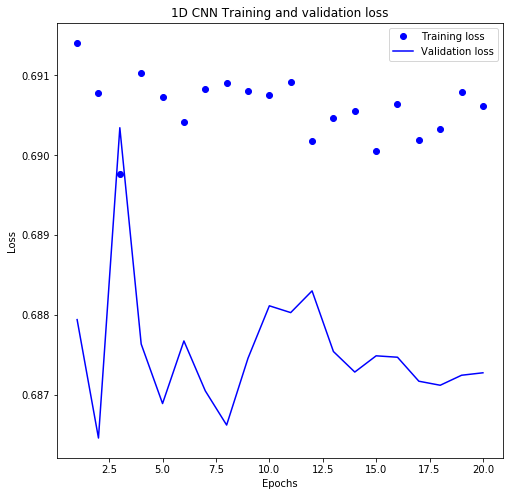

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('1D CNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

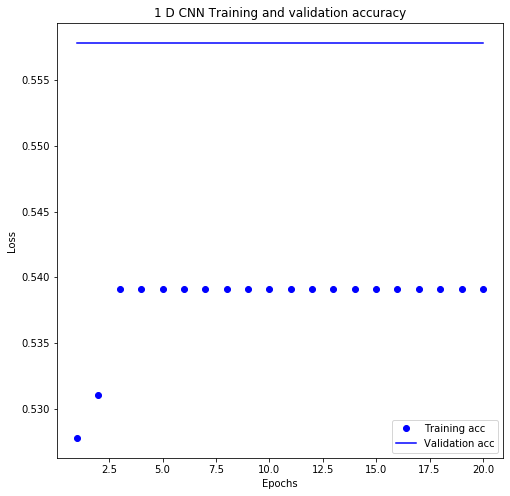

In [73]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('1 D CNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [54]:
#LSTM

In [30]:
max_features = 10000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
maxlen = 200
batch_size = 32
nb_classes = 2

In [31]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(trainheadlines)
sequences_train = tokenizer.texts_to_sequences(trainheadlines)
sequences_test = tokenizer.texts_to_sequences(testheadlines)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [32]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (823, 200)
X_test shape: (1166, 200)


In [33]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

Build model...


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  after removing the cwd from sys.path.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
Total params: 1,411,842
Trainable params: 1,411,842
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('Train...')
start_time_m2 = time.time()
history=model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=20,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
total_time_m2 = time.time() - start_time_m2

print("The LSTM model took %.4f seconds to train." % (total_time_m2))


print('Test score:', score)
print('Test accuracy:', acc)

print("Generating test predictions...")
predsLSTM = model.predict_classes(X_test, verbose=0)
accLSTM = accuracy_score(test['Label'], predsLSTM)
print('prediction accuracy: ', accLSTM)

Train...


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 823 samples, validate on 1166 samples
Epoch 1/20
823/823 [==============================] - 43s 52ms/step - loss: 0.6921 - acc: 0.5310 - val_loss: 0.6906 - val_acc: 0.5386
Epoch 2/20
823/823 [==============================] - 36s 44ms/step - loss: 0.6361 - acc: 0.6695 - val_loss: 0.7056 - val_acc: 0.4786
Epoch 3/20
823/823 [==============================] - 37s 45ms/step - loss: 0.3463 - acc: 0.9235 - val_loss: 0.8912 - val_acc: 0.5206
Epoch 4/20
823/823 [==============================] - 37s 45ms/step - loss: 0.0730 - acc: 0.9830 - val_loss: 1.0348 - val_acc: 0.4931
Epoch 5/20
823/823 [==============================] - 39s 47ms/step - loss: 0.0348 - acc: 0.9951 - val_loss: 1.2351 - val_acc: 0.5189
Epoch 6/20
823/823 [==============================] - 38s 46ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 1.3016 - val_acc: 0.5103
Epoch 7/20
823/823 [==============================] - 37s 45ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.4880 - val_acc: 0.5094
Epoch 8/20
823/

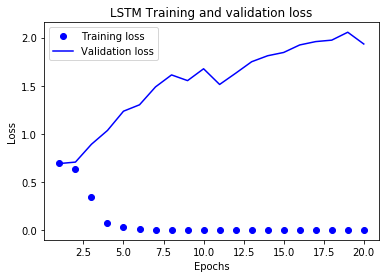

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

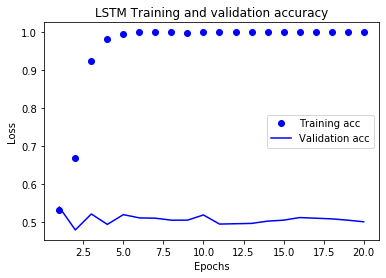

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [85]:
###Part I conlcusion: NLP based binary analysis is not a good indicator for market prediction. 
###Perhaps too much bias in the news itself, acheiving 55% accuracy is not a well performing model. 
###Next step is to look for combinging polarity scores through vader and combining into the stock price 
####data set and conduct time series based evaluation. 

In [167]:
###Part II Analysis- adding sentiment score into the DJIA table 

In [17]:
df_merged = dj.merge(scores,on='Date')
df_merged.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Compound,Positive,Negative,Neutral
0,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,-3.0185,1.677,3.757,19.565
1,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,-5.4389,1.447,3.928,19.624
2,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,-4.2181,1.043,3.624,20.333
3,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,-3.2687,2.072,3.858,19.069
4,2008-08-15,11611.20996,11709.88965,11599.73047,11659.90039,215040000,11659.90039,-4.018,1.756,3.946,19.298


In [18]:
print(df_merged.describe())

               Open          High           Low         Close        Volume  \
count   1988.000000   1988.000000   1988.000000   1988.000000  1.988000e+03   
mean   13460.135680  13542.199221  13373.930165  13463.901829  1.627858e+08   
std     3143.743463   3136.806152   3150.898812   3144.558786  9.394035e+07   
min     6547.009766   6709.609863   6469.950195   6547.049805  8.410000e+06   
25%    10906.909910  11000.367920  10823.662358  10911.889890  9.997250e+07   
50%    13024.120120  13088.610350  12956.274900  13027.419925  1.351250e+08   
75%    16479.214358  16551.700193  16393.942383  16478.777835  1.924575e+08   
max    18315.060550  18351.359380  18272.560550  18312.390630  6.749200e+08   

          Adj Close  
count   1988.000000  
mean   13463.901829  
std     3144.558786  
min     6547.049805  
25%    10911.889890  
50%    13027.419925  
75%    16478.777835  
max    18312.390630  


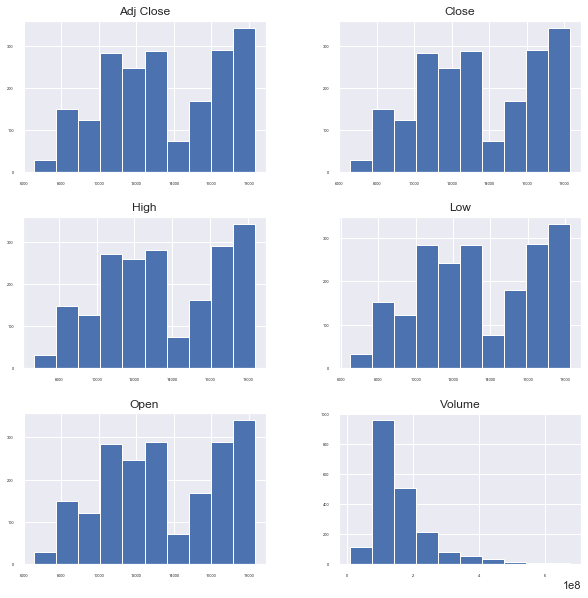

In [19]:
sns.set()
df_merged.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

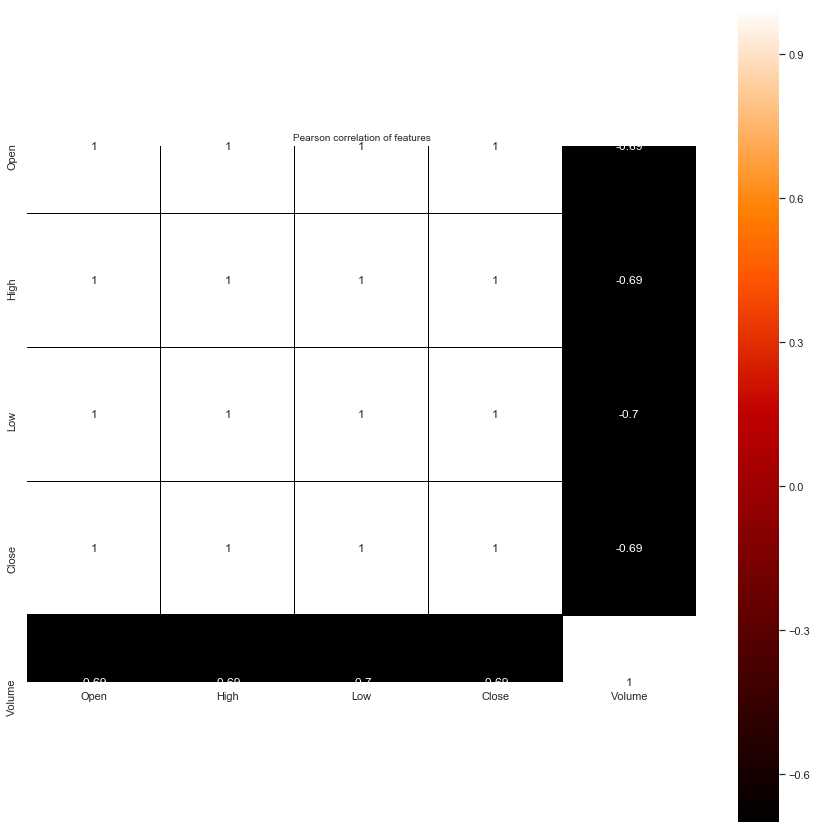

In [45]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of features', y=1.0, size=10)
sns.heatmap(final_df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='black', annot=True)
plt.show()

In [21]:
### Drop adj close form the dataframe
final_df = df_merged[['Date','Compound','Negative','Neutral','Positive','Open','High','Low','Close','Volume']]
final_df.tail()

,Date,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Volume
1983,2016-06-27,-3.5664,4.124,18.826,2.051,17355.21094,17355.21094,17063.08008,17140.24023,138740000
1984,2016-06-28,-1.6828,3.545,19.024,2.429,17190.50977,17409.72070,17190.50977,17409.72070,112190000
1985,2016-06-29,-6.0135,4.797,17.991,2.21,17456.01953,17704.50977,17456.01953,17694.67969,106380000
1986,2016-06-30,-7.0149,4.516,18.759,1.725,17712.75977,17930.60938,17711.80078,17929.99023,133030000
1987,2016-07-01,-8.4568,5.12,17.968,1.911,17924.24023,18002.38086,17916.91016,17949.36914,82160000


In [22]:
print(final_df.shape)
print(final_df.dtypes)

(1988, 10)
Date        datetime64[ns]
Compound            object
Negative            object
Neutral             object
Positive            object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
dtype: object


In [23]:
final_df['Volume'] = final_df['Volume'].astype(float)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
print(final_df.dtypes)

Date        datetime64[ns]
Compound            object
Negative            object
Neutral             object
Positive            object
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
dtype: object


In [25]:
final_df.to_csv('final_df.csv',index=True)

In [50]:
prices = final_df['Close']
volumes = final_df['Volume']

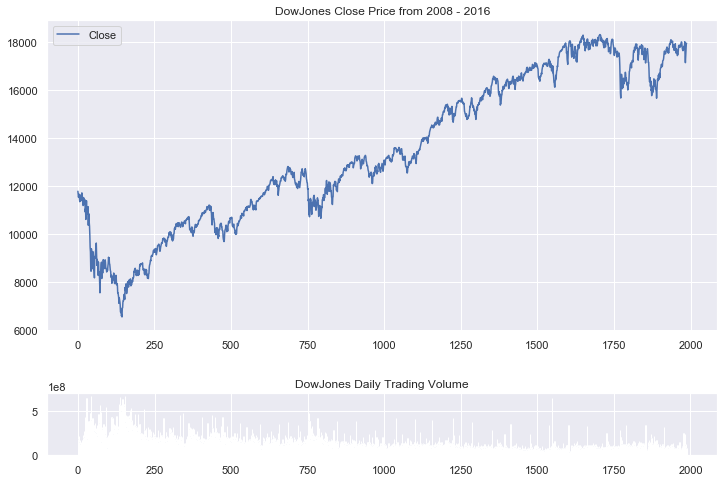

In [52]:
# The top plot consisting of daily closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Close')
plt.title('DowJones Close Price from 2008 - 2016')
plt.legend(loc=2)

 # The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('DowJones Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=1)

In [53]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(final_df)-1))

# 80% of data will be of training
train_end = int(data_to_use*0.8)

total_data = len(final_df)
print("total_data:", total_data)
print("train_end:", train_end)

total_data: 1988
train_end: 1589


In [54]:
final_df.head()

,Date,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Volume
0,2008-08-11,-3.0185,3.757,19.565,1.677,11729.66992,11867.11035,11675.53027,11782.34961,183190000.0
1,2008-08-12,-5.4389,3.928,19.624,1.447,11781.70020,11782.34961,11601.51953,11642.46973,173590000.0
2,2008-08-13,-4.2181,3.624,20.333,1.043,11632.80957,11633.78027,11453.33984,11532.95996,182550000.0
3,2008-08-14,-3.2687,3.858,19.069,2.072,11532.07031,11718.28027,11450.88965,11615.92969,159790000.0
4,2008-08-15,-4.018,3.946,19.298,1.756,11611.20996,11709.88965,11599.73047,11659.90039,215040000.0


In [55]:
start = total_data - data_to_use

# Currently doing prediction only for 1 step ahead
steps_to_predict = 1

#close, compund, neg, neu, pos, open, high, low, volume
# Order -> 8,1,2,3,4,5,6,7,9
yt = final_df.iloc[start:total_data,8] #close
yt1 = final_df.iloc[start:total_data,1] #compund
yt2 = final_df.iloc[start:total_data,2] #neg
yt3 = final_df.iloc[start:total_data,3] #neu
yt4 = final_df.iloc[start:total_data,4] #pos
yo = final_df.iloc[start:total_data,5] #open
yh = final_df.iloc[start:total_data,6] #high
yl = final_df.iloc[start:total_data,7] #low
vt = final_df.iloc[start:total_data,9] #volume

print("yt head (close) :")
print(yt.head())

yt head (close) :
1    11642.46973
2    11532.95996
3    11615.92969
4    11659.90039
5    11479.38965
Name: Close, dtype: float64


In [56]:
print(vt.head())

1    173590000.0
2    182550000.0
3    159790000.0
4    215040000.0
5    156290000.0
Name: Volume, dtype: float64


In [57]:
#shift next day close and next day compund
yt_ = yt.shift(-1) #shifted close
yt1_ = yt1.shift(-1) #shifted compund

#taking only: close, next_close, compund, next_compund, volume, open, high, low
data = pd.concat([yt, yt_, yt1, yt1_, vt, yo, yh, yl], axis=1)
data.columns = ['yt', 'yt_', 'yt1', 'yt1_','vt', 'yo', 'yh', 'yl']

data = data.dropna()
     
print(data[:10])

             yt          yt_      yt1     yt1_           vt           yo  \
1   11642.46973  11532.95996  -5.4389  -4.2181  173590000.0  11781.70020   
2   11532.95996  11615.92969  -4.2181  -3.2687  182550000.0  11632.80957   
3   11615.92969  11659.90039  -3.2687   -4.018  159790000.0  11532.07031   
4   11659.90039  11479.38965   -4.018  -5.1051  215040000.0  11611.20996   
5   11479.38965  11348.54981  -5.1051  -6.8494  156290000.0  11659.65039   
6   11348.54981  11417.42969  -6.8494  -4.0011  171580000.0  11478.08984   
7   11417.42969  11430.20996  -4.0011  -5.9883  144880000.0  11345.94043   
8   11430.20996  11628.05957  -5.9883  -1.9697  130020000.0  11415.23047   
9   11628.05957  11386.25000  -1.9697 -10.4274  138790000.0  11426.79004   
10  11386.25000  11412.87012 -10.4274  -7.3009  148610000.0  11626.19043   

             yh           yl  
1   11782.34961  11601.51953  
2   11633.78027  11453.33984  
3   11718.28027  11450.88965  
4   11709.88965  11599.73047  
5   1169

In [58]:
# target variable - closed price
# after shifting
y = data['yt_'] #next_close

# close, compund, next_compund, volume, open, high, low   
cols = ['yt', 'yt1', 'yt1_', 'vt', 'yo', 'yh', 'yl']
x = data[cols]

In [59]:
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [72]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [61]:
####LSTM 2 layers Adam optimizer 

In [62]:
batch_size = 32
nb_epoch = 40
neurons = 25
dropout = 0.1

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True,  activation='tanh'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))

model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`


In [63]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 25)             2700      
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 25)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 25)             5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 25)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_6 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [64]:
model.compile(loss='mse' , optimizer='Adam')
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 1271 samples, validate on 318 samples
Epoch 1/40
1271/1271 [==============================] - 22s 17ms/step - loss: 0.1088 - val_loss: 0.4270
Epoch 2/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0542 - val_loss: 0.1418
Epoch 3/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0453 - val_loss: 0.0805
Epoch 4/40
1271/1271 [==============================] - 6s 4ms/step - loss: 0.0427 - val_loss: 0.0826
Epoch 5/40
1271/1271 [==============================] - 7s 5ms/step - loss: 0.0391 - val_loss: 0.0847
Epoch 6/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0331 - val_loss: 0.0987
Epoch 7/40
1271/1271 [==============================] - 7s 5ms/step - loss: 0.0280 - val_loss: 0.0839
Epoch 8/40
1271/1271 [==============================] - 7s 6ms/step - loss: 0.0217 - val_loss: 0.0732
Epoch 9/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0135 - val_loss: 0.0640
Epoch 10/40
1271/1271 [==========

In [73]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

396/396 [==============================] - 5s 12ms/step
in train MSE =  0.0067
in test MSE =  0.07729469571495429


In [74]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)

Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (396, 7, 1)
Actual output: (396, 1)
prediction data:
[16092.988]
actual data
[[ 1.79000996e+04 -8.97080000e+00 -4.70330000e+00 ...  1.79100195e+04
   1.79379609e+04  1.78148105e+04]
 [ 1.79587891e+04 -4.70330000e+00 -6.14500000e+00 ...  1.79030508e+04
   1.79911895e+04  1.79030508e+04]
 [ 1.78524805e+04 -6.14500000e+00 -5.11600000e+00 ...  1.79549395e+04
   1.79605605e+04  1.78042793e+04]
 ...
 [ 1.74097207e+04 -1.68280000e+00 -6.01350000e+00 ...  1.71905098e+04
   1.74097207e+04  1.71905098e+04]
 [ 1.76946797e+04 -6.01350000e+00 -7.01490000e+00 ...  1.74560195e+04
   1.77045098e+04  1.74560195e+04]
 [ 1.79299902e+04 -7.01490000e+00 -8.45680000e+00 ...  1.77127598e+04
   1.79306094e+04  1.77118008e+04]]


In [67]:
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


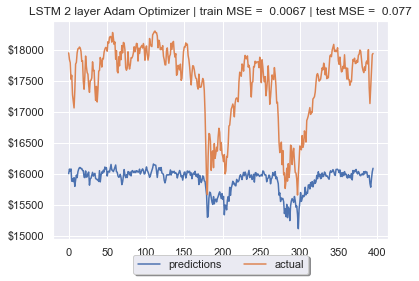

<Figure size 432x288 with 0 Axes>

In [75]:
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('LSTM 2 layer Adam Optimizer | train MSE =  0.0067 | test MSE =  0.077')
plt.show()
plt.clf()

In [ ]:
#####LSTM 1 layer Adam optimizer

In [76]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))


model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  del sys.path[0]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 7, 25)             2700      
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 25)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
____________________________________________________

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`


In [77]:
model.compile(loss='mse' , optimizer='Adam')
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 1271 samples, validate on 318 samples
Epoch 1/40
1271/1271 [==============================] - 14s 11ms/step - loss: 0.0901 - val_loss: 0.3050
Epoch 2/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0413 - val_loss: 0.0949
Epoch 3/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0334 - val_loss: 0.0927
Epoch 4/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0239 - val_loss: 0.0828
Epoch 5/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0113 - val_loss: 0.0499
Epoch 6/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0052 - val_loss: 0.0409
Epoch 7/40
1271/1271 [==============================] - 3s 3ms/step - loss: 0.0035 - val_loss: 0.0294
Epoch 8/40
1271/1271 [==============================] - 3s 3ms/step - loss: 0.0029 - val_loss: 0.0257
Epoch 9/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0026 - val_loss: 0.0196
Epoch 10/40
1271/1271 [==========

In [78]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

396/396 [==============================] - 4s 9ms/step
in train MSE =  0.0011
in test MSE =  0.009485374417546624


In [79]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)

Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (396, 7, 1)
Actual output: (396, 1)
prediction data:
[17186.23]
actual data
[[ 1.79000996e+04 -8.97080000e+00 -4.70330000e+00 ...  1.79100195e+04
   1.79379609e+04  1.78148105e+04]
 [ 1.79587891e+04 -4.70330000e+00 -6.14500000e+00 ...  1.79030508e+04
   1.79911895e+04  1.79030508e+04]
 [ 1.78524805e+04 -6.14500000e+00 -5.11600000e+00 ...  1.79549395e+04
   1.79605605e+04  1.78042793e+04]
 ...
 [ 1.74097207e+04 -1.68280000e+00 -6.01350000e+00 ...  1.71905098e+04
   1.74097207e+04  1.71905098e+04]
 [ 1.76946797e+04 -6.01350000e+00 -7.01490000e+00 ...  1.74560195e+04
   1.77045098e+04  1.74560195e+04]
 [ 1.79299902e+04 -7.01490000e+00 -8.45680000e+00 ...  1.77127598e+04
   1.79306094e+04  1.77118008e+04]]


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


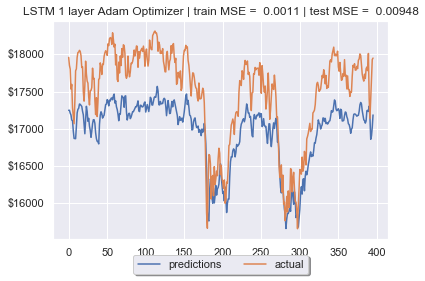

<Figure size 432x288 with 0 Axes>

In [80]:
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('LSTM 1 layer Adam Optimizer | train MSE =  0.0011 | test MSE =  0.00948')
plt.show()
plt.clf()

In [ ]:
####LSTM 1 layer Rmsprop optimizer

In [88]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [82]:
seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))


model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  """


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 7, 25)             2700      
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 25)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
____________________________________________________

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [83]:
model.compile(loss='mse' , optimizer='RMSprop')
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 1271 samples, validate on 318 samples
Epoch 1/40
1271/1271 [==============================] - 9s 7ms/step - loss: 0.0833 - val_loss: 0.1835
Epoch 2/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0400 - val_loss: 0.0798
Epoch 3/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0322 - val_loss: 0.0834
Epoch 4/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0213 - val_loss: 0.0572
Epoch 5/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0090 - val_loss: 0.0447
Epoch 6/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0036 - val_loss: 0.0295
Epoch 7/40
1271/1271 [==============================] - 3s 3ms/step - loss: 0.0027 - val_loss: 0.0212
Epoch 8/40
1271/1271 [==============================] - 3s 2ms/step - loss: 0.0025 - val_loss: 0.0212
Epoch 9/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0023 - val_loss: 0.0212
Epoch 10/40
1271/1271 [============

In [84]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

396/396 [==============================] - 3s 8ms/step
in train MSE =  0.0014
in test MSE =  0.013613319134708375


Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (396, 7, 1)
Actual output: (396, 1)
prediction data:
[17057.328]
actual data
[[ 1.79000996e+04 -8.97080000e+00 -4.70330000e+00 ...  1.79100195e+04
   1.79379609e+04  1.78148105e+04]
 [ 1.79587891e+04 -4.70330000e+00 -6.14500000e+00 ...  1.79030508e+04
   1.79911895e+04  1.79030508e+04]
 [ 1.78524805e+04 -6.14500000e+00 -5.11600000e+00 ...  1.79549395e+04
   1.79605605e+04  1.78042793e+04]
 ...
 [ 1.74097207e+04 -1.68280000e+00 -6.01350000e+00 ...  1.71905098e+04
   1.74097207e+04  1.71905098e+04]
 [ 1.76946797e+04 -6.01350000e+00 -7.01490000e+00 ...  1.74560195e+04
   1.77045098e+04  1.74560195e+04]
 [ 1.79299902e+04 -7.01490000e+00 -8.45680000e+00 ...  1.77127598e+04
   1.79306094e+04  1.77118008e+04]]


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


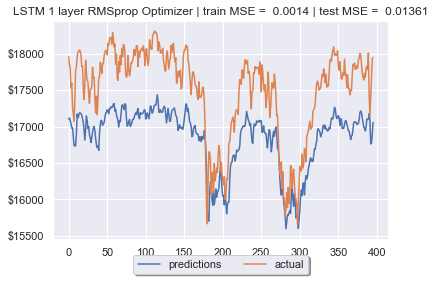

<Figure size 432x288 with 0 Axes>

In [85]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('LSTM 1 layer RMSprop Optimizer | train MSE =  0.0014 | test MSE =  0.01361')
plt.show()
plt.clf()

In [ ]:
####LSTM 1 layer SGD optimizer

In [86]:
model.compile(loss='mse' , optimizer='SGD')
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 1271 samples, validate on 318 samples
Epoch 1/40
1271/1271 [==============================] - 10s 8ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 2/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0015 - val_loss: 0.0038 0s - loss: 0
Epoch 3/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 4/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 5/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 6/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 7/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 8/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 9/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 10/40
1271/1271

In [91]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))


score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

396/396 [==============================] - 4s 11ms/step
in train MSE =  0.0013
in test MSE =  0.012647146217650423


Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (396, 7, 1)
Actual output: (396, 1)
prediction data:
[17075.936]
actual data
[[ 1.79000996e+04 -8.97080000e+00 -4.70330000e+00 ...  1.79100195e+04
   1.79379609e+04  1.78148105e+04]
 [ 1.79587891e+04 -4.70330000e+00 -6.14500000e+00 ...  1.79030508e+04
   1.79911895e+04  1.79030508e+04]
 [ 1.78524805e+04 -6.14500000e+00 -5.11600000e+00 ...  1.79549395e+04
   1.79605605e+04  1.78042793e+04]
 ...
 [ 1.74097207e+04 -1.68280000e+00 -6.01350000e+00 ...  1.71905098e+04
   1.74097207e+04  1.71905098e+04]
 [ 1.76946797e+04 -6.01350000e+00 -7.01490000e+00 ...  1.74560195e+04
   1.77045098e+04  1.74560195e+04]
 [ 1.79299902e+04 -7.01490000e+00 -8.45680000e+00 ...  1.77127598e+04
   1.79306094e+04  1.77118008e+04]]


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


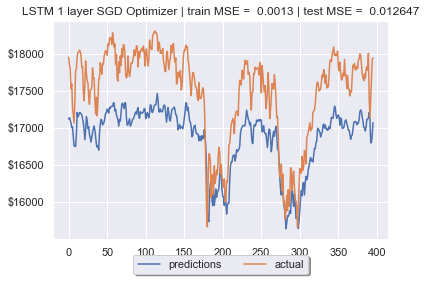

<Figure size 432x288 with 0 Axes>

In [92]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('LSTM 1 layer SGD Optimizer | train MSE =  0.0013 | test MSE =  0.012647')
plt.show()
plt.clf()

In [95]:
seed = 2016
np.random.seed(seed)

neurons = 50

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))


model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  import sys


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 7, 50)             10400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
__________________________________________________

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
  del sys.path[0]


In [96]:
model.compile(loss='mse' , optimizer='SGD')
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 1271 samples, validate on 318 samples
Epoch 1/40
1271/1271 [==============================] - 10s 8ms/step - loss: 0.1231 - val_loss: 0.6656
Epoch 2/40
1271/1271 [==============================] - 3s 2ms/step - loss: 0.1131 - val_loss: 0.6722
Epoch 3/40
1271/1271 [==============================] - 3s 3ms/step - loss: 0.1093 - val_loss: 0.6548
Epoch 4/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.1056 - val_loss: 0.6185
Epoch 5/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.1016 - val_loss: 0.5988
Epoch 6/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0986 - val_loss: 0.5751
Epoch 7/40
1271/1271 [==============================] - 4s 3ms/step - loss: 0.0954 - val_loss: 0.5410
Epoch 8/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0915 - val_loss: 0.5158
Epoch 9/40
1271/1271 [==============================] - 5s 4ms/step - loss: 0.0881 - val_loss: 0.4911
Epoch 10/40
1271/1271 [===========

In [98]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))


score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

396/396 [==============================] - 4s 11ms/step
in train MSE =  0.0323
in test MSE =  0.07444233603644768


Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (396, 7, 1)
Actual output: (396, 1)
prediction data:
[15540.897]
actual data
[[ 1.79000996e+04 -8.97080000e+00 -4.70330000e+00 ...  1.79100195e+04
   1.79379609e+04  1.78148105e+04]
 [ 1.79587891e+04 -4.70330000e+00 -6.14500000e+00 ...  1.79030508e+04
   1.79911895e+04  1.79030508e+04]
 [ 1.78524805e+04 -6.14500000e+00 -5.11600000e+00 ...  1.79549395e+04
   1.79605605e+04  1.78042793e+04]
 ...
 [ 1.74097207e+04 -1.68280000e+00 -6.01350000e+00 ...  1.71905098e+04
   1.74097207e+04  1.71905098e+04]
 [ 1.76946797e+04 -6.01350000e+00 -7.01490000e+00 ...  1.74560195e+04
   1.77045098e+04  1.74560195e+04]
 [ 1.79299902e+04 -7.01490000e+00 -8.45680000e+00 ...  1.77127598e+04
   1.79306094e+04  1.77118008e+04]]


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


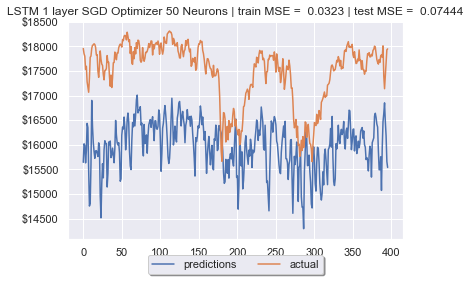

<Figure size 432x288 with 0 Axes>

In [99]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('LSTM 1 layer SGD Optimizer 50 Neurons | train MSE =  0.0323 | test MSE =  0.07444')
plt.show()
plt.clf()

In [ ]:
###FINAL Analysis

In [ ]:
###Part III analysis individual stock performance using same approach with best performing LSTM model

In [189]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

%matplotlib inline

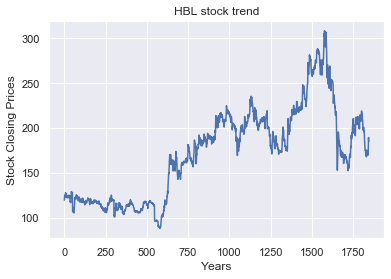

<Figure size 432x288 with 0 Axes>

In [255]:
path=r'''C:\Users\syurasek\OneDrive - Constellation Brands\Documents\Northwestern\PREDICT 458\MSDS 458 Final project'''
os.chdir(path)


data_csv = pd.read_csv('final_data_hbl.csv')

plt.plot(data_csv['Close'])
plt.xlabel('Years')
plt.ylabel('Stock Closing Prices')
plt.title('HBL stock trend')
plt.show()
plt.clf()

In [256]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(data_csv)-1))

# 80% of data will be of training
train_end = int(data_to_use*0.8)

total_data = len(data_csv)
print("total_data:", total_data)

total_data: 1846


In [257]:
start = total_data - data_to_use

# Currently doing prediction only for 1 step ahead
steps_to_predict = 1

#close, compund, neg, neu, pos, open, high, low, volume
# Order -> 8,1,2,3,4,5,6,7,9
yt = data_csv.iloc[start:total_data,8] #close
yt1 = data_csv.iloc[start:total_data,1] #compund
yt2 = data_csv.iloc[start:total_data,2] #neg
yt3 = data_csv.iloc[start:total_data,3] #neu
yt4 = data_csv.iloc[start:total_data,4] #pos
yt5 = data_csv.iloc[start:total_data,5] #open
yt6 = data_csv.iloc[start:total_data,6] #high
yt7 = data_csv.iloc[start:total_data,7] #low
vt = data_csv.iloc[start:total_data,9] #volume

print("yt head (close) :")
print(yt.head())

yt head (close) :
1    121.87
2    124.93
3    124.98
4    124.99
5    123.56
Name: Close, dtype: float64


In [258]:
#shift next day close and next day compund
yt_ = yt.shift(-1) #shifted close
yt1_ = yt1.shift(-1) #shifted compund

#taking only: close, next_close, compund, next_compund, volume, open, high, low
data = pd.concat([yt, yt_, yt1, yt1_, vt, yt5, yt6, yt7], axis=1)
data.columns = ['yt', 'yt_', 'yt1', 'yt1_','vt', 'yt5', 'yt6', 'yt7']

data = data.dropna()
     
print(data[:10])

        yt     yt_     yt1    yt1_       vt     yt5     yt6     yt7
1   121.87  124.93 -0.6996 -0.9442   627959  119.50  122.30  119.50
2   124.93  124.98 -0.9442 -0.7906  1506848  121.75  126.45  121.40
3   124.98  124.99 -0.7906 -0.5859   773913  124.50  125.89  123.75
4   124.99  123.56 -0.5859 -0.9723   376749  125.84  126.06  124.69
5   123.56  123.01 -0.9723 -0.9578   166214  126.24  126.80  123.00
6   123.01  127.87 -0.9578 -0.3818   329849  123.61  124.50  122.75
7   127.87  127.60 -0.3818 -0.7184   788687  124.00  128.90  123.89
8   127.60  126.70 -0.7184 -0.8720   156709  128.70  128.97  126.25
9   126.70  126.79 -0.8720 -0.5994   278339  128.48  128.48  126.45
10  126.79  125.58 -0.5994 -0.7506   195832  127.75  128.00  126.34


In [259]:
# target variable - closed price
# after shifting
y = data['yt_'] #next_close

# close, compund, next_compund, volume, open, high, low   
cols = ['yt', 'yt1', 'yt1_', 'vt', 'yt5', 'yt6', 'yt7']
x = data[cols]

In [260]:
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [266]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x1),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y1)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [262]:
batch_size = 32
nb_epoch = 40
neurons = 25
dropout = 0.1

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))


model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
  app.launch_new_instance()


In [263]:
model.compile(loss='mse' , optimizer='Adam')
history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1180 samples, validate on 296 samples
Epoch 1/40
1180/1180 [==============================] - 19s 16ms/step - loss: 0.1682 - val_loss: 0.2597
Epoch 2/40
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0855 - val_loss: 0.1437
Epoch 3/40
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0598 - val_loss: 0.0838
Epoch 4/40
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0341 - val_loss: 0.0252
Epoch 5/40
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0239 - val_loss: 0.0155
Epoch 6/40
1180/1180 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0108
Epoch 7/40
1180/1180 [==============================] - 3s 3ms/step - loss: 0.0113 - val_loss: 0.0080
Epoch 8/40
1180/1180 [==============================] - 3s 3ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 9/40
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0060 - val_loss: 0.0066
Epoch 10/40
1180/1180 [==========

In [267]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

367/367 [==============================] - 4s 10ms/step
in train MSE =  0.0016
in test MSE =  0.031724585942925244


Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (367, 7, 1)
Actual output: (367, 1)
prediction data:
[194.36044]
actual data
[[272.46     0.7351  -0.9849 ... 274.5    283.99   259.46  ]
 [262.89    -0.9849  -0.3784 ... 275.     275.9    261.25  ]
 [261.75    -0.3784  -0.9716 ... 265.28   265.5    259.5   ]
 ...
 [174.8     -0.8853  -0.9939 ... 172.     176.49   171.    ]
 [181.72    -0.9939  -0.6908 ... 175.     183.54   174.02  ]
 [189.47    -0.6908   0.9178 ... 181.     189.74   180.02  ]]


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


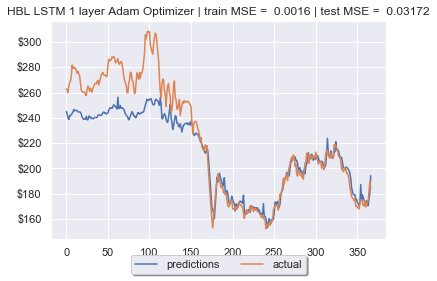

<Figure size 432x288 with 0 Axes>

In [268]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test1)
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('HBL LSTM 1 layer Adam Optimizer | train MSE =  0.0016 | test MSE =  0.03172')
plt.show()
plt.clf()

In [150]:
####MSFT trail run

In [ ]:
msft = pd.read_csv('MSFT.csv')
msft.head()

In [154]:
print(msft.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [165]:
msft['Date'] = pd.to_datetime(msft['Date'])
 
print("\n----------------After----------------\n")
print(msft.dtypes)
print(msft)


----------------After----------------

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
          Date       Open       High        Low      Close  Adj Close  \
0   2014-03-10  37.990002  38.009998  37.720001  37.820000  33.296108   
1   2014-03-11  37.869999  38.230000  37.720001  38.020000  33.472176   
2   2014-03-12  37.799999  38.430000  37.790001  38.270000  33.692265   
3   2014-03-13  38.419998  38.450001  37.639999  37.889999  33.357719   
4   2014-03-14  37.650002  38.139999  37.509998  37.700001  33.190453   
..         ...        ...        ...        ...        ...        ...   
102 2014-08-04  42.970001  43.470001  42.810001  43.369999  38.451584   
103 2014-08-05  43.310001  43.459999  42.830002  43.080002  38.194481   
104 2014-08-06  42.740002  43.169998  42.209999  42.740002  37.893036   
105 2014-08-07  42.8

In [216]:
msft_m = msft.merge(scores,on='Date')

In [225]:
msft_m = msft_m[['Date','Compound','Negative','Neutral','Positive','Open','High','Low','Close','Volume']]

In [226]:
msft_m.head()

,Date,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Volume
0,2014-03-10,-7.8571,4.381,19.746,0.874,37.990002,38.009998,37.720001,37.820000,19006600
1,2014-03-11,-6.6226,4.562,19.746,0.692,37.869999,38.230000,37.720001,38.020000,25216400
2,2014-03-12,-4.8956,3.258,20.522,1.22,37.799999,38.430000,37.790001,38.270000,30494100
3,2014-03-13,-0.6524,1.649,22.122,1.229,38.419998,38.450001,37.639999,37.889999,32169700
4,2014-03-14,-1.2281,2.613,20.792,1.597,37.650002,38.139999,37.509998,37.700001,27195600


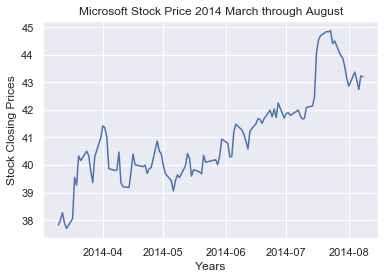

In [221]:
plt.plot(msft_m['Date'], msft_m['Close'])
plt.xlabel('Years')
plt.ylabel('Stock Closing Prices')
plt.title('Microsoft Stock Price 2014 March through August')
plt.show()

In [227]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(msft_m)-1))

# 80% of data will be of training
train_end = int(data_to_use*0.8)

total_data = len(msft_m)
print("total_data:", total_data)

total_data: 107


In [228]:
start = total_data - data_to_use

# Currently doing prediction only for 1 step ahead
steps_to_predict = 1

#close, compund, neg, neu, pos, open, high, low, volume
# Order -> 8,1,2,3,4,5,6,7,9
yt = msft_m.iloc[start:total_data,8] #close
yt1 = msft_m.iloc[start:total_data,1] #compund
yt2 = msft_m.iloc[start:total_data,2] #neg
yt3 = msft_m.iloc[start:total_data,3] #neu
yt4 = msft_m.iloc[start:total_data,4] #pos
yt5 = msft_m.iloc[start:total_data,5] #open
yt6 = msft_m.iloc[start:total_data,6] #high
yt7 = msft_m.iloc[start:total_data,7] #low
vt = msft_m.iloc[start:total_data,9] #volume

print("yt head (close) :")
print(yt.head())

yt head (close) :
1    38.020000
2    38.270000
3    37.889999
4    37.700001
5    38.049999
Name: Close, dtype: float64


In [229]:
#shift next day close and next day compund
yt_ = yt.shift(-1) #shifted close
yt1_ = yt1.shift(-1) #shifted compund

#taking only: close, next_close, compund, next_compund, volume, open, high, low
msft_data = pd.concat([yt, yt_, yt1, yt1_, vt, yt5, yt6, yt7], axis=1)
msft_data.columns = ['yt', 'yt_', 'yt1', 'yt1_','vt', 'yt5', 'yt6', 'yt7']

msft_data = msft_data.dropna()
     
print(data[:10])

        yt     yt_     yt1    yt1_       vt     yt5     yt6     yt7
1   121.87  124.93 -0.6996 -0.9442   627959  119.50  122.30  119.50
2   124.93  124.98 -0.9442 -0.7906  1506848  121.75  126.45  121.40
3   124.98  124.99 -0.7906 -0.5859   773913  124.50  125.89  123.75
4   124.99  123.56 -0.5859 -0.9723   376749  125.84  126.06  124.69
5   123.56  123.01 -0.9723 -0.9578   166214  126.24  126.80  123.00
6   123.01  127.87 -0.9578 -0.3818   329849  123.61  124.50  122.75
7   127.87  127.60 -0.3818 -0.7184   788687  124.00  128.90  123.89
8   127.60  126.70 -0.7184 -0.8720   156709  128.70  128.97  126.25
9   126.70  126.79 -0.8720 -0.5994   278339  128.48  128.48  126.45
10  126.79  125.58 -0.5994 -0.7506   195832  127.75  128.00  126.34


In [239]:
# target variable - closed price
# after shifting
y = msft_data['yt_'] #next_close

# close, compund, next_compund, volume, open, high, low   
cols = ['yt', 'yt1', 'yt1_', 'vt', 'yt5', 'yt6', 'yt7']
x = msft_data[cols]

In [240]:
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [251]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [245]:
batch_size = 32
nb_epoch = 40
neurons = 25
dropout = 0.1

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))

model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

model.compile(loss='mean_squared_error' , optimizer='Adam')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(7, 1), recurrent_activation="sigmoid")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
  from ipykernel import kernelapp as app
C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 7, 25)             2700      
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 25)             0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_26 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 26        
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
___________________________________________________

In [252]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

20/20 [==============================] - 0s 10ms/step
in train MSE =  0.0538
in test MSE =  0.6023781254887581


Inputs: (None, 7, 1)
Outputs: (None, 1)
Actual input: (20, 7, 1)
Actual output: (20, 1)
prediction data:
[40.942898]
actual data
[[ 4.2090000e+01 -6.1229000e+00 -4.4818000e+00  2.4083000e+07
   4.1700001e+01  4.2090000e+01  4.1480000e+01]
 [ 4.2139999e+01 -4.4818000e+00 -4.2064000e+00  2.1881100e+07
   4.2220001e+01  4.2450001e+01  4.2040001e+01]
 [ 4.2450001e+01 -4.2064000e+00 -6.2996000e+00  2.8748700e+07
   4.2330002e+01  4.2470001e+01  4.2029999e+01]
 [ 4.4080002e+01 -6.2996000e+00 -3.4403000e+00  6.3318000e+07
   4.2509998e+01  4.4310001e+01  4.2480000e+01]
 [ 4.4529999e+01 -3.4403000e+00 -7.2139000e+00  8.2180300e+07
   4.5450001e+01  4.5709999e+01  4.4250000e+01]
 [ 4.4689999e+01 -7.2139000e+00 -1.0852900e+01  4.3407500e+07
   4.4650002e+01  4.4840000e+01  4.4250000e+01]
 [ 4.4840000e+01 -1.0852900e+01 -3.7905000e+00  3.7604400e+07
   4.4560001e+01  4.5160000e+01  4.4220001e+01]
 [ 4.4830002e+01 -3.7905000e+00 -1.0938200e+01  4.3095800e+07
   4.5000000e+01  4.5150002e+01  4.4590

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


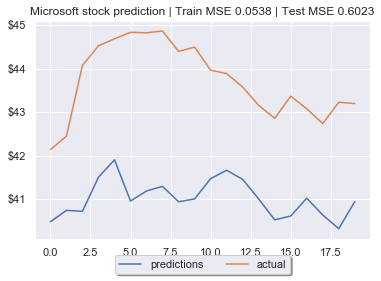

<Figure size 432x288 with 0 Axes>

In [253]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)

#########################################################################
'''Plotting'''
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.title('Microsoft stock prediction | Train MSE 0.0538 | Test MSE 0.6023')
plt.show()
plt.clf()